In [ ]:
import pandas as pd

### Task 1 Merging 12 month data on the csv file

In [ ]:
df =pd.read_csv("./Sales_Data/Sales_April_2019.csv")

df.head()

In [ ]:
import pandas as pd
import os

files =[file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df =pd.read_csv("./Sales_Data/"+ file)
    all_months_data=pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

### Read in updated data frame

In [ ]:
all_data = pd.read_csv("all_data.csv")
all_data

## cleaning up the data

##### Drop rows of NAN

In [ ]:
all_data.isnull().sum()

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)] # bys this we find nan
nan_df

all_data = all_data.dropna(how='all')
all_data

### FInd 'Or' and delete it

In [ ]:
temp_df = all_data[all_data['Order Date'].str[0:2] ==  'Or']
temp_df

# temp_df = all_data[all_data['Order Date'] ==  'Order Date']
# temp_df

# temp_df = all_data[all_data['Order Date'].str.contains('Or')]
# temp_df

# to remove the 'Or' we all data != to 0r
all_data = all_data[all_data['Order Date'].str[0:2] !=  'Or']
all_data.head()

#### Correct column to the correct Data type

In [ ]:
all_data['Quantity Ordered'] =pd.to_numeric(all_data['Quantity Ordered'])  # MAKE INT
all_data['Price Each'] =pd.to_numeric(all_data['Price Each'])    # Make float

all_data.head()
all_data.dtypes

In [ ]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')

In [ ]:
all_data.dtypes                   # check data type of column

### Augment data with additional column 

#### Task 2 Adding month column

In [ ]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'] = all_data['month'].astype('int32')
all_data.head()

#### Task 3 Sales column

In [ ]:
all_data['sales']= all_data['Quantity Ordered']*all_data['Price Each']
all_data

#### Add a City column


### important function

In [ ]:
# let use .apply method

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]     # city have duplicate with state so we use this to seprate.also to remove next vist number

all_data['city'] =all_data['Purchase Address'].apply(lambda x: get_city(x)+'('+get_state(x)+ ')' ) # also use (lambda x: f"{set_city(x)}({get_state(x)}")
# all_data['city'] =all_data['Purchase Address'].apply(lambda x: x.split(',)[1]) # we also use this to get city nam into the purchase address
all_data.head()


### What was the best month for sale ? how much was earned that month ?

In [ ]:
results = all_data.groupby(['month']).sum()
results.head(2)

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['sales'] )

plt.xticks(months)
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

#### which city has the highest number of sales?

In [ ]:
results = all_data.groupby(['city']).sum()
results.head(2)

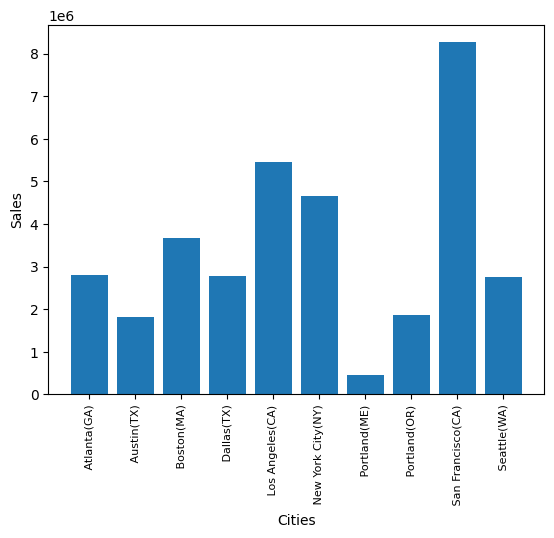

In [53]:
import matplotlib.pyplot as plt

# cities =all_data['city'].unique()   # by this we canot get correct sales in each city
# print(cities)
cities = [city for city, df in all_data.groupby('city')] # by this we get correct sales in each city

plt.bar(cities , results['sales'])

plt.xticks(cities , rotation='vertical' , size=8 )
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()

### Task 4 : which time should we display the advertisment to maximize the liklihood of buying products 

In [55]:
all_data.head(2)

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   

           Order Date                   Purchase Address  month  sales  \
0 2019-04-19 08:46:00       917 1st St, Dallas, TX 75001      4  23.90   
2 2019-04-07 22:30:00  682 Chestnut St, Boston, MA 02215      4  99.99   

          city  hour  min  
0   Dallas(TX)     8   46  
2   Boston(MA)    22   30

In [56]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

all_data['hour']=all_data['Order Date'].dt.hour
all_data['min']=all_data['Order Date'].dt.minute
all_data.head(2)

#all_data.drop(columns =['Hour'] ,inplace=True)

C:\Users\JPC\AppData\Local\Temp\ipykernel_8840\533063865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
C:\Users\JPC\AppData\Local\Temp\ipykernel_8840\533063865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['hour']=all_data['Order Date'].dt.hour
C:\Users\JPC\AppData\Local\Temp\ipykernel_8840\533063865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   

           Order Date                   Purchase Address  month  sales  \
0 2019-04-19 08:46:00       917 1st St, Dallas, TX 75001      4  23.90   
2 2019-04-07 22:30:00  682 Chestnut St, Boston, MA 02215      4  99.99   

          city  hour  min  
0   Dallas(TX)     8   46  
2   Boston(MA)    22   30

In [57]:
all_data['hour'].dtype

dtype('int32')

In [58]:
hour_count = all_data.groupby(['hour']).count()
hour_count.head(6)

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   

      Purchase Address  month  sales  city   min  
hour                                              
0                 3910   3910   3910  3910  3910  
1                 2350   2350   2350  2350  2350  
2                 1243   1243   1243  1243  1243  
3                  831    831    831   831   831  
4                  854    854    854   854   854  
5                 1321   1321   1321  1321  1321

In [60]:
hours = [hour for hour, df in all_data.groupby('hour')]
hours
plt.plot(hours, all_data.groupby(['hour']).count())
# all_data.groupby(['hour']).count()

plt.xticks(hours)
plt.xlabel("hours")
plt.ylabel("Number of orders")
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
all_data.head(1)

### Task 4 Which phone are most sold together? 

In [64]:
df =all_data[all_data['Order ID'].duplicated(keep=False)]        # keep is used  for the duplication
df

Order ID                     Product  Quantity Ordered  Price Each  \
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
18       176574                Google Phone                 1      600.00   
19       176574        USB-C Charging Cable                 1       11.95   
30       176585  Bose SoundSport Headphones                 1       99.99   
...         ...                         ...               ...         ...   
186792   259303       AA Batteries (4-pack)                 1        3.84   
186803   259314            Wired Headphones                 1       11.99   
186804   259314      AAA Batteries (4-pack)                 2        2.99   
186841   259350                Google Phone                 1      600.00   
186842   259350        USB-C Charging Cable                 1       11.95   

                Order Date                       Purchase Address  month  \
3      2019-04-12 14:38:00   669 Spruce St, Los Angeles, CA 90001      4   
4      2019-04-12 14:38:00   669 Spruce St, Los Angeles, CA 90001      4   
18     2019-04-03 19:42:00      20 Hill St, Los Angeles, CA 90001      4   
19     2019-04-03 19:42:00      20 Hill St, Los Angeles, CA 90001      4   
30     2019-04-07 11:31:00      823 Highland St, Boston, MA 02215      4   
...                    ...                                    ...    ...   
186792 2019-09-20 20:18:00          106 7th St, Atlanta, GA 30301      9   
186803 2019-09-16 00:25:00     241 Highland St, Atlanta, GA 30301      9   
186804 2019-09-16 00:25:00     241 Highland St, Atlanta, GA 30301      9   
186841 2019-09-30 13:49:00  519 Maple St, San Francisco, CA 94016      9   
186842 2019-09-30 13:49:00  519 Maple St, San Francisco, CA 94016      9   

         sales                city  hour  min  
3       600.00     Los Angeles(CA)    14   38  
4        11.99     Los Angeles(CA)    14   38  
18      600.00     Los Angeles(CA)    19   42  
19       11.95     Los Angeles(CA)    19   42  
30       99.99          Boston(MA)    11   31  
...        ...                 ...   ...  ...  
186792    3.84         Atlanta(GA)    20   18  
186803   11.99         Atlanta(GA)     0   25  
186804    5.98         Atlanta(GA)     0   25  
186841  600.00   San Francisco(CA)    13   49  
186842   11.95   San Francisco(CA)    13   49  

[14649 rows x 11 columns]

In [66]:

df['grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x) )

df =df[['Order ID','grouped']].drop_duplicates()  #To remove the duplicate with same order id 

df.head()




C:\Users\JPC\AppData\Local\Temp\ipykernel_8840\1652203559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x) )


Order ID                                            grouped
3     176560                      Google Phone,Wired Headphones
18    176574                  Google Phone,USB-C Charging Cable
30    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32    176586                AAA Batteries (4-pack),Google Phone
119   176672      Lightning Charging Cable,USB-C Charging Cable

In [69]:
from itertools import combinations
from collections import Counter

count =Counter()

for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# print(count)     
count.most_common(10)

for key,value in count.most_common():
    print(key,value)





('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

### what product sold the most ?why it is sold the most?

In [67]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  month   sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

               city  hour  min  
0        Dallas(TX)     8   46  
2        Boston(MA)    22   30  
3   Los Angeles(CA)    14   38  
4   Los Angeles(CA)    14   38  
5   Los Angeles(CA)     9   27

In [70]:
# TypeError: datetime64 type does not support sum operations
# ( This error occurs so i drop a date column and make new dataframe(new_all) )

new_all = all_data.drop(columns =['Order Date'])
new_all


product_group =new_all.groupby('Product')
# product_group.sum()

quantity_ordered =product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products ,quantity_ordered)

plt.xticks(products, rotation= 'vertical', size=8 )

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [87]:
prices = new_all.groupby(['Product'])['Price Each'].mean()
prices
# print(prices)

fig ,ax1 = plt.subplots()

ax2 =ax1.twinx()
ax1.bar(products ,quantity_ordered)
ax1.plot(products, prices , 'b')


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($', color ='b'  )

plt.xticks(products, rotation= 'vertical', size=8 )
plt.show()